In [1]:
import numpy as np
from math import sqrt,log10
import pylab as plt
from scipy.interpolate import interp1d as interp
from scipy.optimize import brentq, minimize_scalar
from profiles import build_profile, build_kernel
from dispersion import SphericalJeansDispersion
from likelihood import GaussianLikelihood
from fitter import MinuitFitter

%matplotlib inline

In [2]:
directory = '/home/andrea/Desktop/work/DWARF/dsphsim/'
rh = 0.04
D = 39.81
theta = 2*rh/D

In [3]:
dm = build_profile('NFW')
st = build_profile('plummer',**{'rh':rh}) # Plummer Stellar profile
kr = build_kernel('iso') # isotropic kernel
dwarf_props = {'D':D, 'theta':theta, 'rt':np.inf, 'with_errs':False}
Sigma = SphericalJeansDispersion(dm, st, kr, dwarf_props)

In [4]:
R, v = np.loadtxt(directory+'Ret2_data/dsph_001.txt',usecols=(5, 7),unpack=True)
v = v[~np.isnan(v)]
R = R[~np.isnan(v)]
dv = np.zeros_like(v)

In [5]:
LL = GaussianLikelihood([R, v, dv, 0.], Sigma)
global global_loglike
global_loglike = LL
M = MinuitFitter(LL)

In [6]:
dm_true = build_profile('NFW')
rvmax = 0.757
vmax = 10.4
rs = rvmax/2.163
rhos = 4.625 * (vmax/rs)**2 / (4*np.pi*4.302e-6)
dm_true.r0 = rs
dm_true.rho0 = rhos
Jtrue = log10(dm_true.Jfactor(**dwarf_props))
print 'rs = %.2f, rhos = %.2e, J = %.2f'%(rs,rhos,Jtrue)

rs = 0.35, rhos = 7.55e+07, J = 16.72


In [7]:
# J
M.set_value('J',18)
M.set_error('J',0.01)
# r0
M.set_free('dm_r0')
M.set_value('dm_r0',rh*2.)
M.set_error('dm_r0',0.01)
# a
M.set_free('dm_a')
M.set_value('dm_a',1.)
M.set_error('dm_a',0.01)
# b
M.set_free('dm_b')
M.set_value('dm_b',3.)
M.set_error('dm_b',0.01)
# c
M.set_free('dm_c')
M.set_value('dm_c',1.)
M.set_error('dm_c',0.01)

In [8]:
M.settings

{'J': 18,
 'dm_a': 1,
 'dm_b': 3,
 'dm_c': 1.0,
 'dm_r0': 1,
 'error_J': 0.01,
 'error_dm_a': 0.01,
 'error_dm_b': 0.01,
 'error_dm_c': 0.01,
 'error_dm_r0': 0.01,
 'errordef': 0.5,
 'pedantic': False,
 'print_level': 0}

In [9]:
M.settings['print_level'] = 1
M.set_minuit(**{'tol':1e4,'strategy':1})
BF = M.migrad_min()

fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.393482
     dm_b = +3.000000
        J = +18.000000
     dm_c = +1.000000
    dm_r0 = +1.000000

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -nan
     dm_b = -nan
        J = -nan
     dm_c = -nan
    dm_r0 = -nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +nan
     dm_b = +nan
        J = +nan
     dm_c = +nan
    dm_r0 = +nan

  return self.minuit.migrad(**kwargs)
/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:295: UserWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg)

FCN = 1195.78399312 
 TOTAL NCALL = 167 
 NCALLS = 167 
 
 
 EDM = 0.0995289760683 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,2.282298e-01,1.105557e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.098536e+00,6.880771e-01,0.000000e+00,0.000000e+00,,,
3,J,1.702325e+01,2.271655e-01,0.000000e+00,0.000000e+00,,,
4,dm_c,9.683847e-01,1.014257e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,2.430959e+00,1.994818e+00,0.000000e+00,0.000000e+00,,,


In [10]:
J_array = np.linspace(15,18,10)
J_new = np.empty([0])
L_arr = np.empty([0])
a_arr = np.empty([0])
b_arr = np.empty([0])
c_arr = np.empty([0])
r_arr = np.empty([0])

In [11]:
LL = GaussianLikelihood([R, v, dv, 0.], Sigma)
LL.set_free('dm_r0')
LL.set_free('dm_a')
LL.set_free('dm_b')
LL.set_free('dm_c')
global global_loglike
global_loglike = LL

In [12]:
for J in J_array:
    M = MinuitFitter(LL)
    # J
    M.set_value('J',J)
    M.set_fixed('J')
    # r0
    M.set_value('dm_r0',rh*2.)
    M.set_error('dm_r0',0.01)
    # a
    M.set_value('dm_a',1.)
    M.set_error('dm_a',0.01)
    # b
    M.set_value('dm_b',3.)
    M.set_error('dm_b',0.01)
    # c
    M.set_value('dm_c',1.)
    M.set_error('dm_c',0.01)
    
    M.settings['print_level'] = 1
    M.set_minuit(**{'tol':1,'strategy':1})
    
    valid = False
    while not valid:
        BF = M.migrad_min()
        valid = BF[0]['is_valid']
        maxval = BF[0]['fval'] - M.minuit.tol*BF[0]['up']*1e-4
        if maxval<0 and not valid:
            break
        M.minuit.tol *= 10
    else:
        J_new = np.append(J_new,J)
        L_arr = np.append(L_arr,BF[0]['fval'])
        a_arr = np.append(a_arr,BF[1][0]['value'])
        b_arr = np.append(b_arr,BF[1][1]['value'])
        c_arr = np.append(c_arr,BF[1][3]['value'])
        r_arr = np.append(r_arr,BF[1][4]['value'])

fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +1.304531
     dm_b = +3.407061
        J = +15.000000
     dm_c = -0.055643
    dm_r0 = +0.106339

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -nan
     dm_b = -nan
        J = +15.000000
     dm_c = -nan
    dm_r0 = -nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +nan
     dm_b = +nan
        J = +15.000000
     dm_c = +nan
    dm_r0 = +nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +1.400119
     dm_b = +3.496708
        J = +15.000000
     dm_c = -0.000041
    dm_r0 = +0.113785

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a 

FCN = 1200.40284985 
 TOTAL NCALL = 159 
 NCALLS = 159 
 
 
 EDM = nan 
 GOAL EDM = 5e-05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.400119e+00,nan,0.000000e+00,0.000000e+00,,,
2,dm_b,3.496708e+00,nan,0.000000e+00,0.000000e+00,,,
3,J,1.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.417945e-03,nan,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.137851e-01,nan,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.782882
     dm_b = +2.624147
        J = +15.333333
     dm_c = -0.084042
    dm_r0 = +0.058966

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -nan
     dm_b = -nan
        J = +15.333333
     dm_c = -nan
    dm_r0 = -nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +nan
     dm_b = +nan
        J = +15.333333
     dm_c = +nan
    dm_r0 = +nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.793255
     dm_b = +2.695523
        J = +15.333333
     dm_c = -0.111727
    dm_r0 = +0.059631

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a 

FCN = 1195.91889187 
 TOTAL NCALL = 275 
 NCALLS = 262 
 
 
 EDM = 0.111587752529 
 GOAL EDM = 5e-05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,8.532403e-01,3.781648e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.588749e+00,8.731412e-01,0.000000e+00,0.000000e+00,,,
3,J,1.533333e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.069732e-02,3.506207e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,6.508901e-02,5.266743e-02,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.824983
     dm_b = +2.526865
        J = +15.333333
     dm_c = -0.106577
    dm_r0 = +0.050064

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.823570
     dm_b = +2.523771
        J = +15.333333
     dm_c = -0.112441
    dm_r0 = +0.049313

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.823499
     dm_b = +2.523616
        J = +15.333333
     dm_c = -0.112734
    dm_r0 = +0.049275

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.823496
     dm_b = +2.523609
        J = +15.333333
     dm_c = -0.112749
    dm_r0 = +0.049273

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 1195.91889187 
 TOTAL NCALL = 318 
 NCALLS = 17 
 
 
 EDM = 0.111640388495 
 GOAL EDM = 0.0005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,8.532403e-01,3.781648e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.588749e+00,8.731412e-01,0.000000e+00,0.000000e+00,,,
3,J,1.533333e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.069732e-02,3.506207e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,6.508901e-02,5.266743e-02,0.000000e+00,0.000000e+00,,,


FCN = 1195.91889187 
 TOTAL NCALL = 361 
 NCALLS = 17 
 
 
 EDM = 0.111640388495 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,8.532403e-01,3.781648e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.588749e+00,8.731412e-01,0.000000e+00,0.000000e+00,,,
3,J,1.533333e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.069732e-02,3.506207e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,6.508901e-02,5.266743e-02,0.000000e+00,0.000000e+00,,,


FCN = 1195.91889187 
 TOTAL NCALL = 13365 
 NCALLS = 17 
 
 
 EDM = 0.111640388495 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,8.532403e-01,3.781648e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.588749e+00,8.731412e-01,0.000000e+00,0.000000e+00,,,
3,J,1.533333e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.069732e-02,3.506207e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,6.508901e-02,5.266743e-02,0.000000e+00,0.000000e+00,,,


FCN = 1195.91889187 
 TOTAL NCALL = 13395 
 NCALLS = 17 
 
 
 EDM = 0.111640388495 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,8.532403e-01,3.781648e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.588749e+00,8.731412e-01,0.000000e+00,0.000000e+00,,,
3,J,1.533333e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.069732e-02,3.506207e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,6.508901e-02,5.266743e-02,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.581081
     dm_b = +2.354475
        J = +15.666667
     dm_c = -0.053044
    dm_r0 = +0.036416

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -nan
     dm_b = -nan
        J = +15.666667
     dm_c = -nan
    dm_r0 = -nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +nan
     dm_b = +nan
        J = +15.666667
     dm_c = +nan
    dm_r0 = +nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.592445
     dm_b = +2.347616
        J = +15.666667
     dm_c = -0.032247
    dm_r0 = +0.037581

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a 

FCN = 1195.16744838 
 TOTAL NCALL = 401 
 NCALLS = 388 
 
 
 EDM = 0.00110250219439 
 GOAL EDM = 5e-05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,6.258016e-01,4.653551e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.330965e+00,6.403430e-01,0.000000e+00,0.000000e+00,,,
3,J,1.566667e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,2.724337e-02,7.904284e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,4.076953e-02,5.509368e-02,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.588812
     dm_b = +2.317056
        J = +15.666667
     dm_c = -0.049211
    dm_r0 = +0.035260

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.586962
     dm_b = +2.316361
        J = +15.666667
     dm_c = -0.053034
    dm_r0 = +0.034985

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.586870
     dm_b = +2.316326
        J = +15.666667
     dm_c = -0.053225
    dm_r0 = +0.034971

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.586865
     dm_b = +2.316324
        J = +15.666667
     dm_c = -0.053235
    dm_r0 = +0.034970

  return self.minuit.migrad(**kwargs)


FCN = 1195.16744838 
 TOTAL NCALL = 448 
 NCALLS = 21 
 
 
 EDM = 0.00562364499704 
 GOAL EDM = 0.0005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,6.258016e-01,4.653551e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.330965e+00,6.403430e-01,0.000000e+00,0.000000e+00,,,
3,J,1.566667e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,2.724337e-02,7.904284e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,4.076953e-02,5.509368e-02,0.000000e+00,0.000000e+00,,,


FCN = 1195.16744838 
 TOTAL NCALL = 13456 
 NCALLS = 21 
 
 
 EDM = 0.00562364499704 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,6.258016e-01,4.653551e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.330965e+00,6.403430e-01,0.000000e+00,0.000000e+00,,,
3,J,1.566667e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,2.724337e-02,7.904284e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,4.076953e-02,5.509368e-02,0.000000e+00,0.000000e+00,,,


FCN = 1195.16744838 
 TOTAL NCALL = 13490 
 NCALLS = 21 
 
 
 EDM = 0.00562364499704 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,6.258016e-01,4.653551e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.330965e+00,6.403430e-01,0.000000e+00,0.000000e+00,,,
3,J,1.566667e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,2.724337e-02,7.904284e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,4.076953e-02,5.509368e-02,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +2.666577
     dm_b = +1.780364
        J = +16.000000
     dm_c = -2.063617
    dm_r0 = +5.639887

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +2.771995
     dm_b = +1.741699
        J = +16.000000
     dm_c = -2.188573
    dm_r0 = +5.916093

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +2.777266
     dm_b = +1.739766
        J = +16.000000
     dm_c = -2.194821
    dm_r0 = +5.929904

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +2.777530
     dm_b = +1.739669
        J = +16.000000
     dm_c = -2.195133
    dm_r0 = +5.930594

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 1195.0951652 
 TOTAL NCALL = 679 
 NCALLS = 666 
 
 
 EDM = 0.000159242046619 
 GOAL EDM = 5e-05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,5.582020e-01,nan,0.000000e+00,0.000000e+00,,,
2,dm_b,2.553651e+00,nan,0.000000e+00,0.000000e+00,,,
3,J,1.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,4.355046e-01,nan,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.157507e-01,nan,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +nan
     dm_b = +2.553651
        J = +16.000000
     dm_c = +0.435505
    dm_r0 = +0.115751

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.558202
     dm_b = +nan
        J = +16.000000
     dm_c = +0.435505
    dm_r0 = +0.115751

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.558202
     dm_b = +2.553651
        J = +16.000000
     dm_c = +nan
    dm_r0 = +0.115751

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +0.558202
     dm_b = +2.553651
        J = +16.000000
     dm_c = +0.435505
    dm_r0 = +nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following a

FCN = 1195.0951652 
 TOTAL NCALL = 717 
 NCALLS = 25 
 
 
 EDM = nan 
 GOAL EDM = 0.0005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,5.582020e-01,nan,0.000000e+00,0.000000e+00,,,
2,dm_b,2.553651e+00,nan,0.000000e+00,0.000000e+00,,,
3,J,1.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,4.355046e-01,nan,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.157507e-01,nan,0.000000e+00,0.000000e+00,,,


FCN = 1195.07752537 
 TOTAL NCALL = 142 
 NCALLS = 142 
 
 
 EDM = 2.87583708414e-05 
 GOAL EDM = 5e-05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.259119e+00,1.444030e+00,0.000000e+00,0.000000e+00,,,
2,dm_b,2.053765e+00,1.039179e+00,0.000000e+00,0.000000e+00,,,
3,J,1.633333e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,8.949885e-01,1.450771e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.064437e-01,1.600720e-01,0.000000e+00,0.000000e+00,,,


FCN = 1194.96675542 
 TOTAL NCALL = 539 
 NCALLS = 539 
 
 
 EDM = 4.18065488215e-06 
 GOAL EDM = 5e-05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.039882e+02,1.414212e+00,0.000000e+00,0.000000e+00,,,
2,dm_b,1.697957e+00,4.048956e-01,0.000000e+00,0.000000e+00,,,
3,J,1.666667e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.071199e+00,2.101220e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,7.733382e-02,4.734579e-02,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +7.778357
     dm_b = +1.173845
        J = +17.000000
     dm_c = +1.176389
    dm_r0 = -0.004758

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +7.993441
     dm_b = +1.132984
        J = +17.000000
     dm_c = +1.176454
    dm_r0 = -0.012759

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +8.004195
     dm_b = +1.130941
        J = +17.000000
     dm_c = +1.176457
    dm_r0 = -0.013159

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +8.004733
     dm_b = +1.130838
        J = +17.000000
     dm_c = +1.176457
    dm_r0 = -0.013179

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 1195.14762686 
 TOTAL NCALL = 270 
 NCALLS = 257 
 
 
 EDM = 0.0593686587883 
 GOAL EDM = 5e-05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.476674e+00,1.300477e+01,0.000000e+00,0.000000e+00,,,
2,dm_b,1.991075e+00,2.487102e+00,0.000000e+00,0.000000e+00,,,
3,J,1.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.175092e+00,1.885761e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.552593e-01,4.698585e-01,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +7.788247
     dm_b = +1.173246
        J = +17.000000
     dm_c = +1.176402
    dm_r0 = -0.004917

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +8.003826
     dm_b = +1.132354
        J = +17.000000
     dm_c = +1.176468
    dm_r0 = -0.012926

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +8.014605
     dm_b = +1.130310
        J = +17.000000
     dm_c = +1.176471
    dm_r0 = -0.013326

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +8.015144
     dm_b = +1.130208
        J = +17.000000
     dm_c = +1.176471
    dm_r0 = -0.013346

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 1195.14762686 
 TOTAL NCALL = 313 
 NCALLS = 17 
 
 
 EDM = 0.0595405122053 
 GOAL EDM = 0.0005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.476674e+00,1.300477e+01,0.000000e+00,0.000000e+00,,,
2,dm_b,1.991075e+00,2.487102e+00,0.000000e+00,0.000000e+00,,,
3,J,1.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.175092e+00,1.885761e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.552593e-01,4.698585e-01,0.000000e+00,0.000000e+00,,,


FCN = 1195.14762686 
 TOTAL NCALL = 356 
 NCALLS = 17 
 
 
 EDM = 0.0595405122053 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.476674e+00,1.300477e+01,0.000000e+00,0.000000e+00,,,
2,dm_b,1.991075e+00,2.487102e+00,0.000000e+00,0.000000e+00,,,
3,J,1.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.175092e+00,1.885761e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.552593e-01,4.698585e-01,0.000000e+00,0.000000e+00,,,


FCN = 1195.14762686 
 TOTAL NCALL = 13360 
 NCALLS = 17 
 
 
 EDM = 0.0595405122053 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.476674e+00,1.300477e+01,0.000000e+00,0.000000e+00,,,
2,dm_b,1.991075e+00,2.487102e+00,0.000000e+00,0.000000e+00,,,
3,J,1.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.175092e+00,1.885761e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.552593e-01,4.698585e-01,0.000000e+00,0.000000e+00,,,


FCN = 1195.14762686 
 TOTAL NCALL = 13390 
 NCALLS = 17 
 
 
 EDM = 0.0595405122053 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.476674e+00,1.300477e+01,0.000000e+00,0.000000e+00,,,
2,dm_b,1.991075e+00,2.487102e+00,0.000000e+00,0.000000e+00,,,
3,J,1.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.175092e+00,1.885761e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.552593e-01,4.698585e-01,0.000000e+00,0.000000e+00,,,


FCN = 1195.53603978 
 TOTAL NCALL = 879 
 NCALLS = 879 
 
 
 EDM = 9.89406860939e-06 
 GOAL EDM = 5e-05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.241931e+00,1.014295e+00,0.000000e+00,0.000000e+00,,,
2,dm_b,6.152630e+01,8.413034e+01,0.000000e+00,0.000000e+00,,,
3,J,1.733333e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.271135e+00,1.194312e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.398204e+00,6.212057e-01,0.000000e+00,0.000000e+00,,,


FCN = 1195.53599827 
 TOTAL NCALL = 927 
 NCALLS = 48 
 
 
 EDM = 3.53879385956e-05 
 GOAL EDM = 0.0005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.238839e+00,4.061826e+00,0.000000e+00,0.000000e+00,,,
2,dm_b,6.180150e+01,5.879526e+02,0.000000e+00,0.000000e+00,,,
3,J,1.733333e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.271137e+00,1.315925e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.396610e+00,2.977834e+00,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.004443
     dm_b = +1.461125
        J = +17.666667
     dm_c = +1.249278
    dm_r0 = +0.160656

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.006271
     dm_b = +1.459358
        J = +17.666667
     dm_c = +1.249895
    dm_r0 = +0.160931

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.006362
     dm_b = +1.459270
        J = +17.666667
     dm_c = +1.249926
    dm_r0 = +0.160945

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.006367
     dm_b = +1.459266
        J = +17.666667
     dm_c = +1.249928
    dm_r0 = +0.160945

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 1196.58666212 
 TOTAL NCALL = 211 
 NCALLS = 198 
 
 
 EDM = 0.4711487587 
 GOAL EDM = 5e-05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.210425e-02,6.759984e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,1.496464e+00,1.386495e-01,0.000000e+00,0.000000e+00,,,
3,J,1.766667e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.236941e+00,1.279295e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.551577e-01,3.180357e+00,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.595801
     dm_b = +1.379725
        J = +17.666667
     dm_c = +1.129825
    dm_r0 = +2.915854

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.627197
     dm_b = +1.373888
        J = +17.666667
     dm_c = +1.124470
    dm_r0 = +3.053889

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.628766
     dm_b = +1.373596
        J = +17.666667
     dm_c = +1.124202
    dm_r0 = +3.060791

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.628845
     dm_b = +1.373581
        J = +17.666667
     dm_c = +1.124188
    dm_r0 = +3.061136

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 1196.58666212 
 TOTAL NCALL = 256 
 NCALLS = 19 
 
 
 EDM = 0.435675276049 
 GOAL EDM = 0.0005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.210425e-02,6.759984e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,1.496464e+00,1.386495e-01,0.000000e+00,0.000000e+00,,,
3,J,1.766667e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.236941e+00,1.279295e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.551577e-01,3.180357e+00,0.000000e+00,0.000000e+00,,,


FCN = 1196.58666212 
 TOTAL NCALL = 301 
 NCALLS = 19 
 
 
 EDM = 0.435675276049 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.210425e-02,6.759984e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,1.496464e+00,1.386495e-01,0.000000e+00,0.000000e+00,,,
3,J,1.766667e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.236941e+00,1.279295e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.551577e-01,3.180357e+00,0.000000e+00,0.000000e+00,,,


FCN = 1196.58666212 
 TOTAL NCALL = 13307 
 NCALLS = 19 
 
 
 EDM = 0.435675276049 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.210425e-02,6.759984e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,1.496464e+00,1.386495e-01,0.000000e+00,0.000000e+00,,,
3,J,1.766667e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.236941e+00,1.279295e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.551577e-01,3.180357e+00,0.000000e+00,0.000000e+00,,,


FCN = 1196.58666212 
 TOTAL NCALL = 13339 
 NCALLS = 19 
 
 
 EDM = 0.435675276049 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,3.210425e-02,6.759984e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,1.496464e+00,1.386495e-01,0.000000e+00,0.000000e+00,,,
3,J,1.766667e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.236941e+00,1.279295e-01,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.551577e-01,3.180357e+00,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.416376
     dm_b = +0.351777
        J = +18.000000
     dm_c = +1.363714
    dm_r0 = +0.218416

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -nan
     dm_b = -nan
        J = +18.000000
     dm_c = -nan
    dm_r0 = -nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = +nan
     dm_b = +nan
        J = +18.000000
     dm_c = +nan
    dm_r0 = +nan

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.297571
     dm_b = +0.372253
        J = +18.000000
     dm_c = +1.317637
    dm_r0 = +0.186898

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a 

FCN = 1203.60085106 
 TOTAL NCALL = 126 
 NCALLS = 113 
 
 
 EDM = 8.78573410941 
 GOAL EDM = 5e-05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.900631e-01,1.254230e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.110903e+00,4.220573e-01,0.000000e+00,0.000000e+00,,,
3,J,1.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.127654e+00,5.581296e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.256870e-01,9.897934e-02,0.000000e+00,0.000000e+00,,,


fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.249373
     dm_b = +0.587990
        J = +18.000000
     dm_c = +1.250308
    dm_r0 = -0.195465

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.271345
     dm_b = +0.511844
        J = +18.000000
     dm_c = +1.256441
    dm_r0 = -0.211522

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.272444
     dm_b = +0.508037
        J = +18.000000
     dm_c = +1.256748
    dm_r0 = -0.212325

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     dm_a = -0.272498
     dm_b = +0.507847
        J = +18.000000
     dm_c = +1.256763
    dm_r0 = -0.212365

  return self.minuit.migrad(**kwargs)
fitter.py:81: RuntimeWarning: fcn returns Nan
fcn is cal

FCN = 1203.60085106 
 TOTAL NCALL = 169 
 NCALLS = 17 
 
 
 EDM = 8.78363382105 
 GOAL EDM = 0.0005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.900631e-01,1.254230e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.110903e+00,4.220573e-01,0.000000e+00,0.000000e+00,,,
3,J,1.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.127654e+00,5.581296e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.256870e-01,9.897934e-02,0.000000e+00,0.000000e+00,,,


FCN = 1203.60085106 
 TOTAL NCALL = 212 
 NCALLS = 17 
 
 
 EDM = 8.78363382105 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.900631e-01,1.254230e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.110903e+00,4.220573e-01,0.000000e+00,0.000000e+00,,,
3,J,1.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.127654e+00,5.581296e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.256870e-01,9.897934e-02,0.000000e+00,0.000000e+00,,,


FCN = 1203.60085106 
 TOTAL NCALL = 255 
 NCALLS = 17 
 
 
 EDM = 8.78363382105 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.900631e-01,1.254230e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.110903e+00,4.220573e-01,0.000000e+00,0.000000e+00,,,
3,J,1.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.127654e+00,5.581296e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.256870e-01,9.897934e-02,0.000000e+00,0.000000e+00,,,


FCN = 1203.60085106 
 TOTAL NCALL = 298 
 NCALLS = 17 
 
 
 EDM = 8.78363382105 
 GOAL EDM = 0.5 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.900631e-01,1.254230e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.110903e+00,4.220573e-01,0.000000e+00,0.000000e+00,,,
3,J,1.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.127654e+00,5.581296e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.256870e-01,9.897934e-02,0.000000e+00,0.000000e+00,,,


FCN = 1203.60085106 
 TOTAL NCALL = 13302 
 NCALLS = 17 
 
 
 EDM = 8.78363382105 
 GOAL EDM = 5.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 True

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.900631e-01,1.254230e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.110903e+00,4.220573e-01,0.000000e+00,0.000000e+00,,,
3,J,1.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.127654e+00,5.581296e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.256870e-01,9.897934e-02,0.000000e+00,0.000000e+00,,,


FCN = 1203.60085106 
 TOTAL NCALL = 13332 
 NCALLS = 17 
 
 
 EDM = 8.78363382105 
 GOAL EDM = 50.0 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dm_a,1.900631e-01,1.254230e-01,0.000000e+00,0.000000e+00,,,
2,dm_b,2.110903e+00,4.220573e-01,0.000000e+00,0.000000e+00,,,
3,J,1.800000e+01,1.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
4,dm_c,1.127654e+00,5.581296e-02,0.000000e+00,0.000000e+00,,,
5,dm_r0,1.256870e-01,9.897934e-02,0.000000e+00,0.000000e+00,,,


In [29]:
interp_L = interp(J_new, L_arr-L_arr.min())
interp_r = interp(J_new, r_arr)
interp_a = interp(J_new, a_arr)
interp_b = interp(J_new, b_arr)
interp_c = interp(J_new, c_arr)

In [30]:
eval_Like_J = np.linspace(J_new.min(), J_new.max(), 1e3)
min_Like_J = interp_L(eval_Like_J).min()
Jmin = eval_Like_J[ np.where( interp_L(eval_Like_J) == min_Like_J )[0][0] ]
J_plt = np.linspace(J_new.min(),J_new.max())

In [31]:
Jr = float(interp_r(Jmin))
Ja = float(interp_a(Jmin))
Jb = float(interp_b(Jmin))
Jc = float(interp_c(Jmin))

In [32]:
dm.r0 = Jr
minrho = lambda rho : abs(Jmin - np.log10( dm.Jfactor(**dwarf_props) ) - 2*rho)
Jrho = float(10**minimize_scalar(minrho).x)

In [33]:
print 'r = %.2f, rho = %.2e, a = %.2f, b = %.2f , c = %.2f'%(Jr, Jrho, Ja, Jb ,Jc)

r = 0.08, rho = 4.95e+09, a = 103.99, b = 1.70 , c = 1.07


In [35]:
for i,c in enumerate([0.5,2.0,4.5]):
    exec('J%ssL = %.2f'%(i+1, brentq(lambda j : interp_L(j)-c, J_new.min(), Jmin) - Jmin))
    exec('J%ssR = %.2f'%(i+1, brentq(lambda j : interp_L(j)-c, Jmin, J_new.max()) - Jmin))

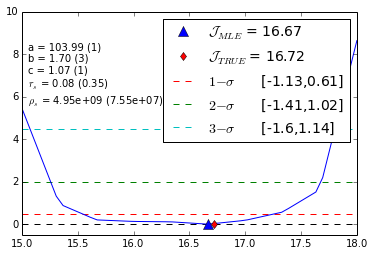

In [46]:
plt.plot(J_plt, interp_L(J_plt))
plt.hlines(0, J_plt.min(), J_plt.max(), linestyles='dashed')
plt.plot(Jmin, 0, 'b^', markersize=10, label=r'$\mathcal{J}_{MLE}$ = %.2f'%Jmin)
plt.plot(16.72, 0, 'rd', markersize=6, label=r'$\mathcal{J}_{TRUE}$ = 16.72')
for i,(c,h) in enumerate(zip(['r','g','c'],[0.5,2.0,4.5])):
    JL, JR = eval('J%ssL'%str(i+1)), eval('J%ssR'%str(i+1))
    plt.hlines(h, J_plt.min(), J_plt.max(), linestyles='dashed', colors=c,
              label=r'$%i-\sigma$'%(i+1)+'\t'+'[%2s,%2s]'%(str(JL),str(JR)))
plt.legend(numpoints=1,fontsize=14).get_frame().set_facecolor('w')
plt.text(15.05, 5,'a = %.2f (1)'%Ja +'\n'+
                 'b = %.2f (3)'%Jb +'\n'+
                 'c = %.2f (1)'%Jc +'\n'+
                 r'$r_s$ = %.2f (0.35)'%Jr +'\n'+
                 r'$\rho_s$ = %.2e (7.55e+07)'%Jrho +'\n')

plt.ylim(-0.5,10);
#plt.savefig('results/LikeJ.png',format='png',dpi=300);